In [271]:
import pandas as pd
train = pd.read_csv('..\\Coursework\\Dataset\\train.csv', usecols=["payprice","click"])
val = pd.read_csv('..\\Coursework\\Dataset\\validation.csv', usecols=["payprice","click"])
# valli = pd.read_csv('..\\Coursework\\Dataset\\validation.csv', usecols=["usertag","payprice","click"])

In [272]:
val.head()

,click,payprice
0,0,23
1,0,75
2,0,65
3,0,6
4,0,5


In [273]:
# random.seed(33)
train_payprice = train["payprice"].sample(303925, random_state = 99)
train_click = train['click'].loc[train_payprice.index]
# train_payprice

In [274]:
# random.seed(33)
validation_payprice = val["payprice"].sample(303925, random_state = 5)
validation_click = val['click'].loc[validation_payprice.index]
# validation_payprice

In [275]:
# from random import randint
# lowerbound = 69
# upperbound = 93

# import random


# while lowerbound<upperbound:
#     sum = 6250 * 1000
#     clicks = 0
#     random.seed(33)
#     for pay,click in zip(val['payprice'],val['click']):
#         sum_sub = sum - pay
#         bidprice = random.uniform(lowerbound, upperbound)
#         if bidprice-pay > 0 and sum_sub >= 0:
#             sum = sum_sub
#             clicks += click
#     print(lowerbound, upperbound, clicks)
#     lowerbound += 1

In [276]:
upper_bound = []
lower_bound = []
clicks_num = []

In [281]:
sum = 6250 * 1000
clicks = 0
spend = 0
impressions = 0
random.seed(33)
for pay,click in zip(train_payprice,train_click):
    sum_sub = sum - pay
    bidprice = random.uniform(0, 300)
    if bidprice-pay > 0 and sum_sub >= 0:
        impressions += 1
        spend += pay
        sum = sum_sub
        clicks += click
print(clicks, sum)
lower_bound.append(0)
upper_bound.append(300)
clicks_num.append(clicks)

71 0


In [278]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

def print_fig(array_bidprice, array_clicks, count):

    plt.figure(figsize=(15, 5))
    plt.scatter(array_bidprice, array_clicks, marker = 'o')
    plt.xlabel("Bid price",fontsize=14, fontweight='bold')
    plt.ylabel("Number of clicks",fontsize=14, fontweight='bold')
    plt.xticks( rotation='vertical',fontsize=14, fontweight='bold')
    plt.yticks(fontsize=14, fontweight='bold')

    plt.savefig('..\\Coursework\\graph\\random_bid_%i.eps' % (count), bbox_inches='tight')
    plt.show()

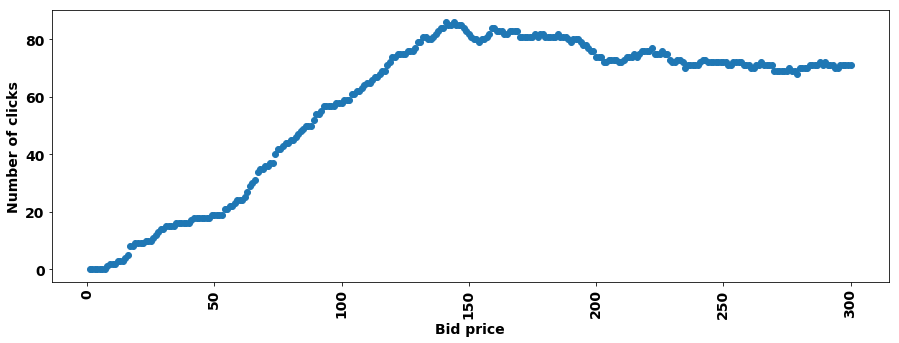

0 141 86


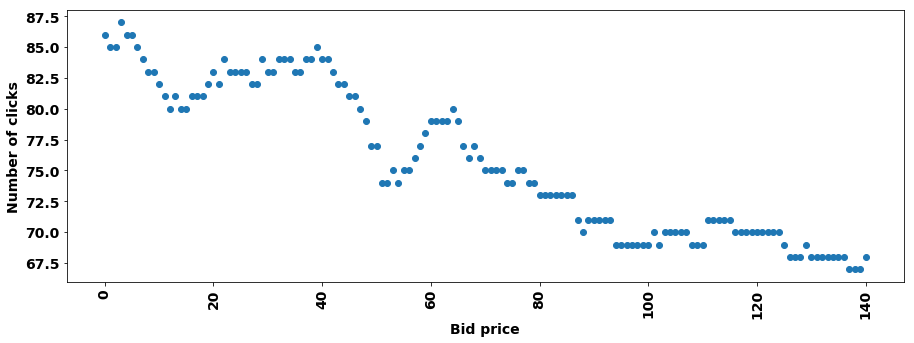

3 141 87


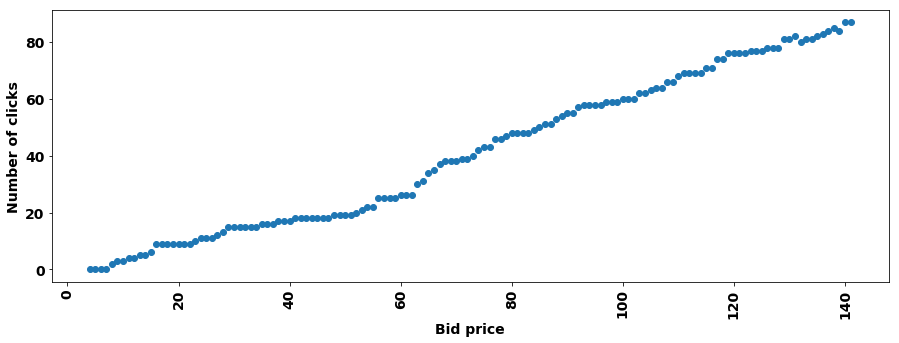

3 140 87


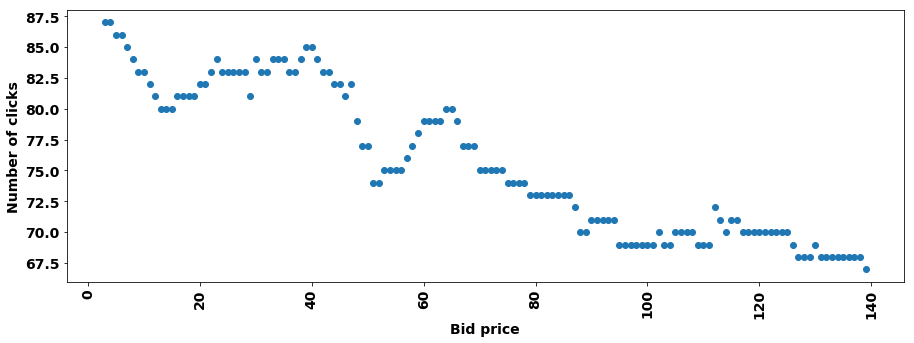

4 140 87


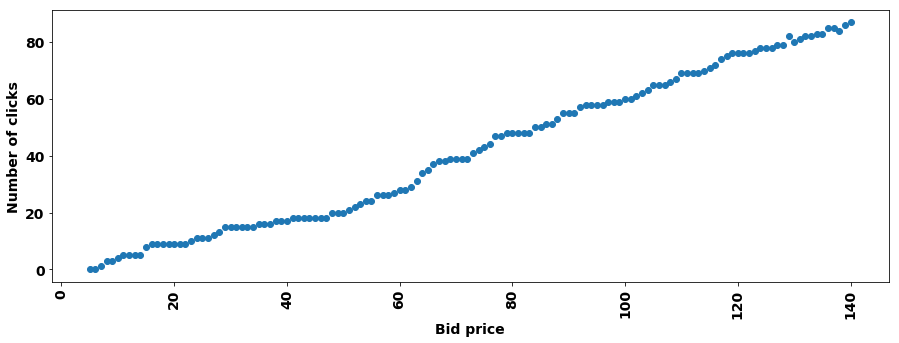

In [279]:
from random import randint
lowerbound = 0
upperbound = 300

import random

for count in range(0,10):
      
    if count % 2 == 0:
        array_bidprice = []
        array_clicks = []
        temp = upperbound
        best_bound = 0
        best_click = 0
        while lowerbound < upperbound:
            sum = 6250 * 1000
            clicks = 0
            random.seed(33)
            for pay,click in zip(train_payprice,train_click):
                sum_sub = sum - pay
                bidprice = random.uniform(lowerbound, upperbound)
                if bidprice-pay > 0 and sum_sub >= 0:
                    sum = sum_sub
                    clicks += click
            if clicks >= best_click:
                best_click = clicks
                best_bound = upperbound
#             print(lowerbound, upperbound, clicks)
            array_bidprice.append(upperbound)
            array_clicks.append(clicks)
            upperbound -= 1
        print_fig(array_bidprice, array_clicks, count)
        upperbound = best_bound
        if upperbound == temp:
            break
        print(lowerbound, upperbound, best_click)
        lower_bound.append(lowerbound)
        upper_bound.append(upperbound)
        clicks_num.append(best_click)
    else:
        array_bidprice = []
        array_clicks = []
        temp = lowerbound
        best_bound = 0
        best_click = 0
        while lowerbound < upperbound:
            sum = 6250 * 1000
            clicks = 0
            random.seed(33)
            for pay,click in zip(train_payprice,train_click):
                sum_sub = sum - pay
                bidprice = random.uniform(lowerbound, upperbound)
                if bidprice-pay > 0 and sum_sub >= 0:
                    sum = sum_sub
                    clicks += click
            if clicks >= best_click:
                best_click = clicks
                best_bound = lowerbound
    #         print(lowerbound, upperbound, clicks)
            array_bidprice.append(lowerbound)
            array_clicks.append(clicks)
            lowerbound += 1
        print_fig(array_bidprice, array_clicks, count)
        lowerbound = best_bound
        if lowerbound == temp:
            break
        print(lowerbound, upperbound,best_click)
        lower_bound.append(lowerbound)
        upper_bound.append(upperbound)
        clicks_num.append(best_click)

In [286]:
d1 = pd.DataFrame(index=['Round 0','Round 1', 'Round 2', 'Round 3', 'Round 4','Round 5'], columns=['Lower Bound', 'Upper Bound', 'Number of Clicks'])

In [287]:
d1["Lower Bound"] = lower_bound
d1["Upper Bound"] = upper_bound
d1["Number of Clicks"] = clicks_num

In [288]:
print(d1.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  Lower Bound &  Upper Bound &  Number of Clicks \\
\midrule
Round 0 &            0 &          150 &                82 \\
Round 1 &            0 &          141 &                86 \\
Round 2 &            3 &          141 &                87 \\
Round 3 &            3 &          140 &                87 \\
Round 4 &            4 &          140 &                87 \\
Round 5 &            0 &          300 &                71 \\
\bottomrule
\end{tabular}



In [284]:
len(upper_bound)

6

In [285]:
print(upper_bound, lower_bound, clicks_num)

[150, 141, 141, 140, 140, 300] [0, 0, 3, 3, 4, 0] [82, 86, 87, 87, 87, 71]


In [61]:
# from random import randint
# lowerbound = 0
# upperbound = 150

# import random

# for count in range(0,10):
      
#     if count % 2 == 0:
#         temp = upperbound
#         best_bound = 0
#         best_click = 0
#         while lowerbound < upperbound:
#             sum = 6250 * 1000
#             clicks = 0
#             random.seed(33)
#             for pay,click in zip(validation_payprice, validation_click):
#                 sum_sub = sum - pay
#                 bidprice = random.uniform(lowerbound, upperbound)
#                 if bidprice-pay > 0 and sum_sub >= 0:
#                     sum = sum_sub
#                     clicks += click
#             if clicks >= best_click:
#                 best_click = clicks
#                 best_bound = upperbound
#     #         print(lowerbound, upperbound, clicks)
#             upperbound -= 1
#         upperbound = best_bound
#         if upperbound == temp:
#             break
#         print(lowerbound, upperbound)
#     else:
#         temp = lowerbound
#         best_bound = 0
#         best_click = 0
#         while lowerbound < upperbound:
#             sum = 6250 * 1000
#             clicks = 0
#             random.seed(33)
#             for pay,click in zip(validation_payprice, validation_click):
#                 sum_sub = sum - pay
#                 bidprice = random.uniform(lowerbound, upperbound)
#                 if bidprice-pay > 0 and sum_sub >= 0:
#                     sum = sum_sub
#                     clicks += click
#             if clicks >= best_click:
#                 best_click = clicks
#                 best_bound = lowerbound
#     #         print(lowerbound, upperbound, clicks)
#             lowerbound += 1
#         lowerbound = best_bound
#         if lowerbound == temp:
#             break
#         print(lowerbound, upperbound)

0 144
21 144


In [71]:
evaluation =pd.DataFrame(index=['Clicks', 'CTR', 'Spend','CPM', 'CPC'], columns=['Evaluation Metric'])

In [289]:
sum = 6250 * 1000
clicks = 0
spend = 0
impressions = 0
random.seed(33)
for pay,click in zip(validation_payprice, validation_click):
    sum_sub = sum - pay
    bidprice = random.uniform(lowerbound, upperbound)
#     bidprice = random.uniform(100,200)
    if bidprice-pay > 0 and sum_sub >= 0:
        impressions += 1
        spend += pay
        sum = sum_sub
        clicks += click
print(clicks, sum)
print(lowerbound, upperbound)
evaluation.loc['Clicks', 'Evaluation Metric'] = clicks
evaluation.loc['Spend', 'Evaluation Metric'] = spend / 1000
evaluation.loc['CTR', 'Evaluation Metric'] = "{:.2f}%".format(clicks / impressions * 100)
evaluation.loc['CPM', 'Evaluation Metric'] = "{:.2f}".format(spend / impressions)
evaluation.loc['CPC', 'Evaluation Metric'] = "{:.2f}".format((spend / 1000) / clicks)

74 0
4 140


In [290]:
print(evaluation.to_latex())

\begin{tabular}{ll}
\toprule
{} & Evaluation Metric \\
\midrule
Clicks &                74 \\
CTR    &             0.05\% \\
Spend  &              6250 \\
CPM    &             43.93 \\
CPC    &             84.46 \\
\bottomrule
\end{tabular}

